In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("PkDroneAttacks.csv")
df

,S#,Week_Day,Month,Day,Year,Prime_Minister,Time,Location,City,Province,No_of_Strike,Al_Qaeda,Taliban,Civilians,Total_Died,Women/Children,Longitude,Latitude
0,1,Friday,6,18,2004,Pervez Musharraf,22:00,Near Wana,South Waziristan,FATA,1,NaN,1.0,4.0,5.0,N,69.90000,33.03330
1,2,Sunday,5,8,2005,Pervez Musharraf,23:30,Mir Ali (Near Afghan Border),North Waziristan,FATA,1,1.0,NaN,1.0,2.0,N,70.14550,32.97460
2,3,Thursday,12,1,2005,Pervez Musharraf,NaN,Haisori- Miran Shah,North Waziristan,FATA,1,1.0,NaN,1.0,5.0,NaN,70.14550,32.97460
3,4,Friday,1,6,2006,Pervez Musharraf,NaN,Saidgai village- 115km north of Wana,North Waziristan,FATA,1,NaN,NaN,NaN,3.0,NaN,70.14550,32.97460
4,5,Friday,1,13,2006,Pervez Musharraf,3:00,Damadola Village,Bajaur Agency,FATA,1,NaN,NaN,18.0,18.0,Y,71.50000,34.68330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,401,Wednesday,5,24,2017,Nawaz Sharif,12:00,"Garvik area, Shawal Tehsil",North Waziristan,FATA,1,NaN,NaN,NaN,3.0,N,32.70619,69.41578
400,402,Monday,6,12,2017,Nawaz Sharif,21:00,Spin Thal,Hangu,KPK,1,NaN,NaN,0.0,2.0,N,33.35869,70.54072
401,403,Monday,7,3,2017,Nawaz Sharif,NaN,NaN,South Waziristan,FATA,2,NaN,NaN,0.0,4.0,N,32.12082,69.58999
402,404,Friday,9,15,2017,Nawaz Sharif,NaN,Ghuz Ghari,Kurram Agency,FATA,2,NaN,NaN,0.0,3.0,N,33.73217,70.15076


In [3]:
# df.drop(['Time'], axis = 1, inplace = True) 

In [4]:
missing_value=df.isnull().sum()
missing_value

S#                  0
Week_Day            0
Month               0
Day                 0
Year                0
Prime_Minister      0
Time              231
Location            2
City                0
Province            0
No_of_Strike        0
Al_Qaeda          308
Taliban           264
Civilians          46
Total_Died          3
Women/Children     68
Longitude           1
Latitude            1
dtype: int64

In [5]:
df[['Civilians','No_of_Strike','Taliban','Al_Qaeda']].sum()

Civilians       2542.0
No_of_Strike     586.0
Taliban          662.0
Al_Qaeda          49.0
dtype: float64

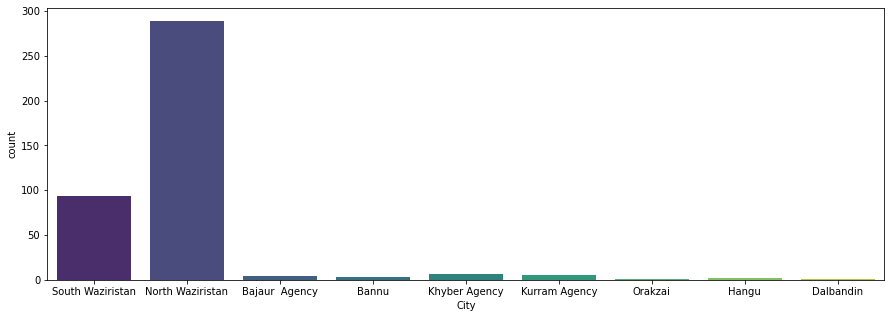

In [6]:
a,ax=plt.subplots(figsize=(15,5))
sns.countplot(data=df, x="City",palette="viridis",ax=ax)
plt.show()

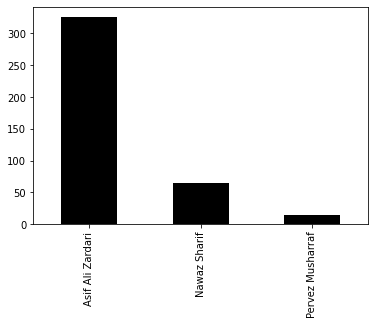

In [7]:
df.Prime_Minister.value_counts().plot(kind="bar",color="black")
plt.show()

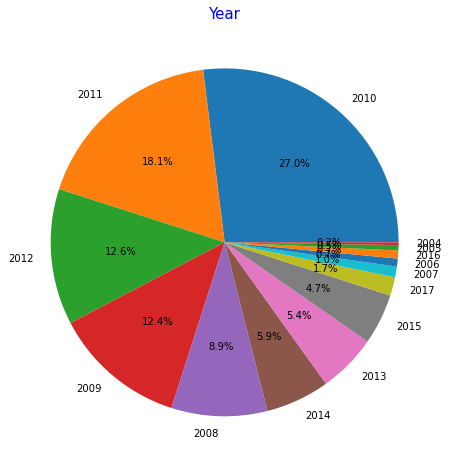

In [8]:
labels = df['Year'].value_counts().index
sizes = df['Year'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%')
plt.title('Year',color = 'Blue',fontsize = 15)
plt.show()

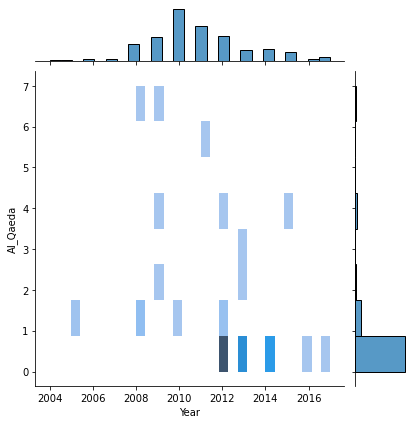

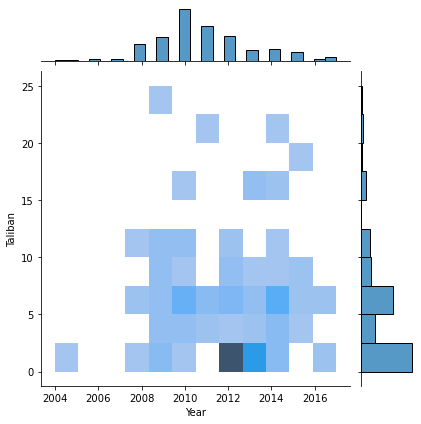

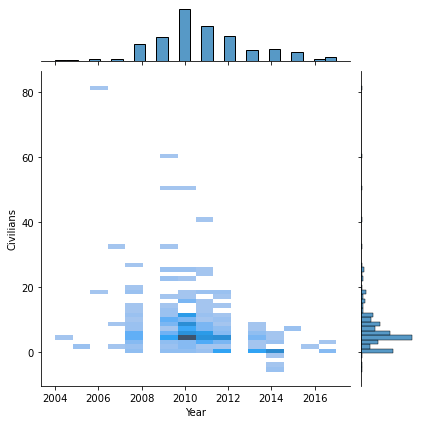

In [9]:
sns.jointplot(data=df, x="Year", y="Al_Qaeda",kind="hist")
sns.jointplot(data=df, x="Year", y="Taliban",kind="hist")
sns.jointplot(data=df, x="Year", y="Civilians",kind="hist")
plt.show()

In [ ]:
# df2 = df.drop(df.columns[[0,1,2,3,6,7,9,14,16,17]],axis = 1)
# df2

,Year,Prime_Minister,City,No_of_Strike,Al_Qaeda,Taliban,Civilians,Total_Died,Women/Children
0,2004,Pervez Musharraf,South Waziristan,1,NaN,1.0,4.0,5.0,N
1,2005,Pervez Musharraf,North Waziristan,1,1.0,NaN,1.0,2.0,N
2,2005,Pervez Musharraf,North Waziristan,1,1.0,NaN,1.0,5.0,NaN
3,2006,Pervez Musharraf,North Waziristan,1,NaN,NaN,NaN,3.0,NaN
4,2006,Pervez Musharraf,Bajaur Agency,1,NaN,NaN,18.0,18.0,Y
...,...,...,...,...,...,...,...,...,...
399,2017,Nawaz Sharif,North Waziristan,1,NaN,NaN,NaN,3.0,N
400,2017,Nawaz Sharif,Hangu,1,NaN,NaN,0.0,2.0,N
401,2017,Nawaz Sharif,South Waziristan,2,NaN,NaN,0.0,4.0,N
402,2017,Nawaz Sharif,Kurram Agency,2,NaN,NaN,0.0,3.0,N


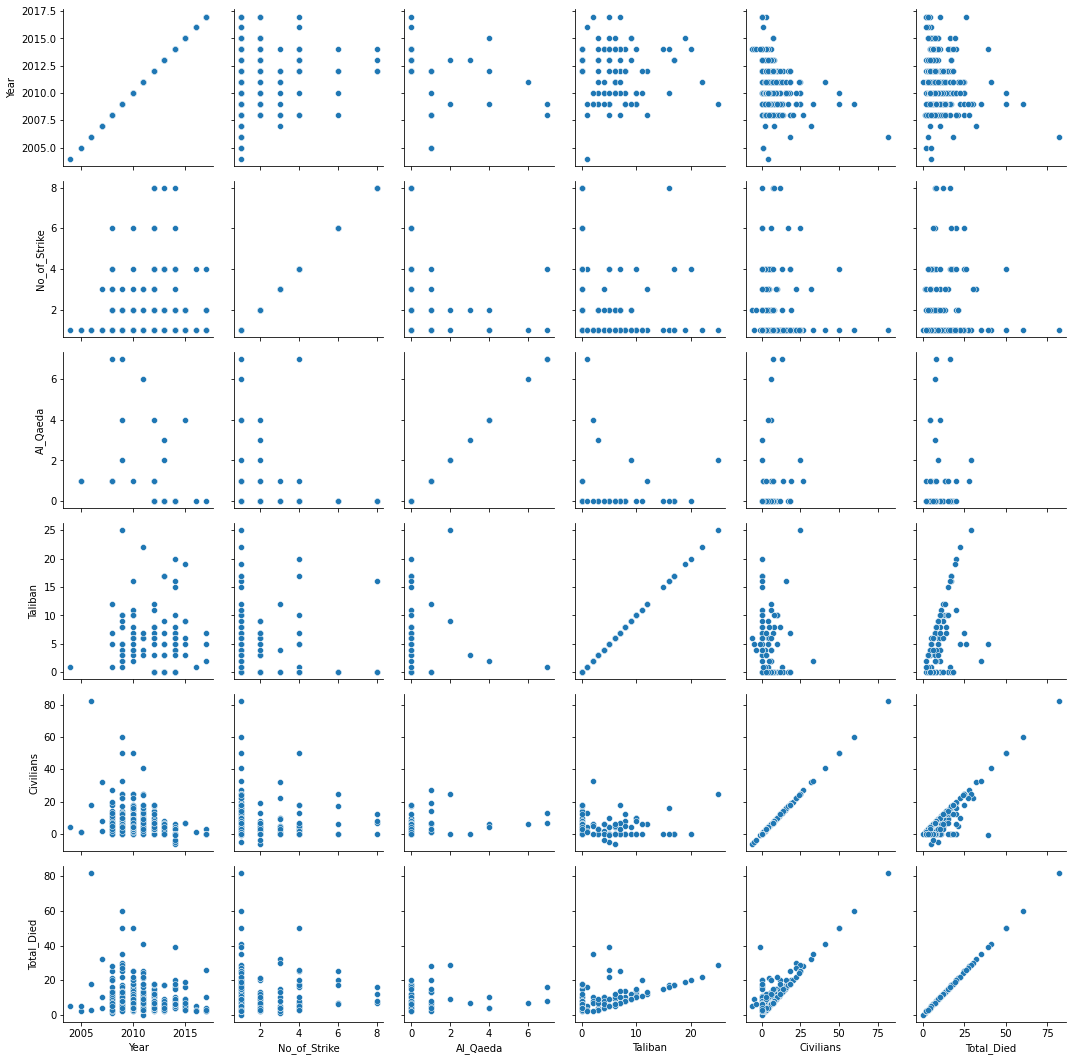

In [21]:
g = sns.PairGrid(df2)
g.map(sns.scatterplot)